In [1]:
from skimage.filters import gabor_kernel
from skimage import io
from skimage.transform import resize
from matplotlib import pyplot as plt 
import numpy as np
import tensorflow_datasets as tfds
import tensorflow as tf

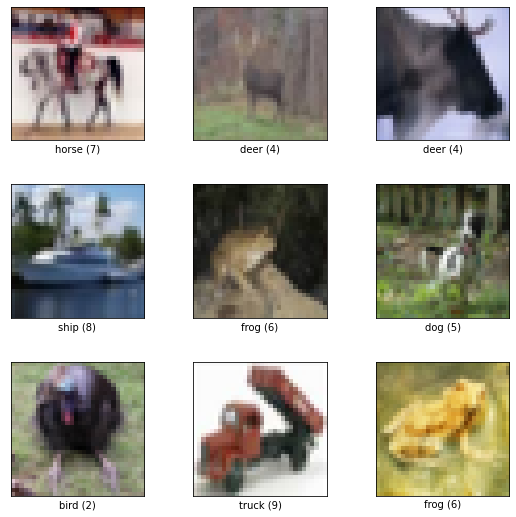

In [2]:
# Construct a tf.data.Dataset
ds, ds_info = tfds.load('cifar10', split=['train', 'test'], shuffle_files=True, with_info=True, as_supervised=True)

if isinstance(ds, list):
    fig = tfds.show_examples(ds[0], ds_info)
else:
    fig = tfds.show_examples(ds, ds_info)


In [3]:
ds

[<_OptionsDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>,
 <_OptionsDataset shapes: ((32, 32, 3), ()), types: (tf.uint8, tf.int64)>]

In [4]:
ds_size = None
train_ds = None
train_size = None
test_ds = None
test_size = None

if isinstance(ds, list):
    train_ds = ds[0]
    train_size = tf.data.experimental.cardinality(train_ds).numpy()
    test_ds = ds[1]
    test_size = tf.data.experimental.cardinality(test_ds).numpy()
    
    ds_size = train_size+test_size
    print("Data size:", ds_size)  
    print("Train size", train_size)
    print("Test size", test_size)
else:
    ds_size = tf.data.experimental.cardinality(ds).numpy()
    print("Data size:", ds_size)

    train_ds = ds.take(0.7 * ds_size)
    train_size = tf.data.experimental.cardinality(train_ds).numpy()
    print("Train size", train_size)

    test_ds = ds.skip(0.7*ds_size)
    test_size = tf.data.experimental.cardinality(test_ds).numpy()
    print("Test size", test_size)


Data size: 60000
Train size 50000
Test size 10000


In [5]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 100
IMAGE_SIZE = 32
NUM_OF_CLASSES = 10

In [6]:
import math

def process_dataset(image, label):
    # Normalize images to have a mean of 0 and standard deviation of 1
#     image = tf.image.per_image_standardization(image)
    
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resize images from 32x32 to 227x227
#     image = tf.image.resize(image, (IMAGE_SIZE,IMAGE_SIZE))

    image = image/255.0
    
#     label = tf.one_hot(tf.cast(label, tf.int32), NUM_OF_CLASSES)
        
    return image, label

def construct_dataset(ds):
    ds = ds.shuffle(buffer_size=BATCH_SIZE)
    ds = ds.map(process_dataset,num_parallel_calls=AUTOTUNE)
    
#     ds=ds.repeat()
    ds = ds.batch(BATCH_SIZE, drop_remainder=False)
    ds = ds.prefetch(buffer_size=AUTOTUNE)
    return ds

train_data = construct_dataset(train_ds)
test_data = construct_dataset(test_ds)

steps_per_epoch=math.ceil(train_size/BATCH_SIZE)
validation_steps=math.ceil(test_size/BATCH_SIZE)



In [7]:
print(tf.data.experimental.cardinality(test_data).numpy())
print(steps_per_epoch)
print(validation_steps)

100
500
100


In [8]:
for image, label in test_ds.take(1):
    image = tf.image.convert_image_dtype(image, tf.float32)
    image = image/255.0
    
    print(image)
    print(label)
    label = tf.one_hot(tf.cast(label, tf.int32), NUM_OF_CLASSES)
#     print(image)
    print(label)

tf.Tensor(
[[[0.00276817 0.00286044 0.00290657]
  [0.00247597 0.00256824 0.00258362]
  [0.00215302 0.00224529 0.00218378]
  ...
  [0.00079969 0.00084583 0.00061515]
  [0.00078431 0.00084583 0.00061515]
  [0.00078431 0.00083045 0.00061515]]

 [[0.00264514 0.00273741 0.00270665]
  [0.00230681 0.00239908 0.00235294]
  [0.00181469 0.00192234 0.00181469]
  ...
  [0.00069204 0.0007228  0.0005075 ]
  [0.00066128 0.00069204 0.00047674]
  [0.00067666 0.00073818 0.00052288]]

 [[0.00247597 0.00258362 0.00246059]
  [0.00226067 0.0023837  0.00224529]
  [0.00184544 0.0019531  0.00181469]
  ...
  [0.00064591 0.00073818 0.0005075 ]
  [0.00066128 0.00076894 0.00052288]
  [0.00070742 0.00086121 0.00059977]]

 ...

 [[0.0038293  0.0038293  0.0038293 ]
  [0.00389081 0.00389081 0.00389081]
  [0.00387543 0.00387543 0.00387543]
  ...
  [0.00390619 0.00390619 0.00390619]
  [0.00392157 0.00392157 0.00392157]
  [0.00386005 0.00386005 0.00386005]]

 [[0.0038293  0.0038293  0.0038293 ]
  [0.00389081 0.00389081 0

In [9]:
for image, label in test_data.take(1):
    print(image.shape)
    print(image)
    print(label)

print(tf.data.experimental.cardinality(test_data).numpy())
    

(100, 32, 32, 3)
tf.Tensor(
[[[[2.78354483e-03 2.98346812e-03 3.19876987e-03]
   [2.75278743e-03 2.93733180e-03 3.15263378e-03]
   [2.75278743e-03 2.93733180e-03 3.15263378e-03]
   ...
   [2.73740874e-03 2.92195310e-03 3.13725509e-03]
   [2.73740874e-03 2.92195310e-03 3.13725509e-03]
   [2.69127265e-03 2.92195310e-03 3.12187639e-03]]

  [[2.76816613e-03 2.95271073e-03 3.16801248e-03]
   [2.73740874e-03 2.90657440e-03 3.12187639e-03]
   [2.73740874e-03 2.92195310e-03 3.13725509e-03]
   ...
   [2.70665134e-03 2.89119571e-03 3.10649769e-03]
   [2.70665134e-03 2.89119571e-03 3.10649769e-03]
   [2.67589395e-03 2.90657440e-03 3.10649769e-03]]

  [[2.76816613e-03 2.95271073e-03 3.16801248e-03]
   [2.73740874e-03 2.92195310e-03 3.13725509e-03]
   [2.73740874e-03 2.92195310e-03 3.13725509e-03]
   ...
   [2.69127265e-03 2.92195310e-03 3.12187639e-03]
   [2.67589395e-03 2.92195310e-03 3.12187639e-03]
   [2.66051525e-03 2.90657440e-03 3.10649769e-03]]

  ...

  [[2.59900047e-03 2.78354483e-03 2.99

In [10]:
# Importing the Keras libraries and packages
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Activation
from tensorflow.keras.layers import Input, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import RMSprop, Adam

# dimensionality of input and latent encoded representations
inpt_dim = (IMAGE_SIZE, IMAGE_SIZE, 3)

inpt_img = Input(shape=inpt_dim)

# Block 1
cl1 = Conv2D(64, (3, 3), strides=(2, 2),activation='relu', input_shape = inpt_dim)(inpt_img)
bnl2 = BatchNormalization()(cl1)
# afl3 = Activation('relu')(bnl2)
pl4 = MaxPooling2D(pool_size = (2, 2))(bnl2)

# Adding a second convolutional layer
cl5 = Conv2D(128, (3, 3), strides=(1, 1), activation='relu')(pl4)
bnl6 = BatchNormalization()(cl5)
# afl7 = Activation('relu')(bnl6)
pl8 = MaxPooling2D(pool_size = (2, 2))(bnl6)
bnl9 = BatchNormalization()(pl8)

# Step 3 - Flattening
fl10 = Flatten()(bnl9)

# Step 4 - Full connection
dol11 = Dropout(0.5)(fl10)
dl12 = Dense(units = 256, activation = 'relu')(dol11)
dol13 = Dropout(0.2)(dl12)
dl14 = Dense(units = 64, activation = 'relu')(dol13)
dol15 = Dropout(0.1)(dl14)
output = Dense(units = NUM_OF_CLASSES, activation = 'sigmoid')(dol15)

classifier = Model(inpt_img, output)

# Compiling the CNN
opt = RMSprop(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

classifier.compile(optimizer = opt, loss = 'binary_crossentropy', 
                   metrics = ['accuracy'])

print(classifier.summary())

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 15, 15, 64)        1792      
_________________________________________________________________
batch_normalization (BatchNo (None, 15, 15, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 5, 5, 128)         73856     
_________________________________________________________________
batch_normalization_1 (Batch (None, 5, 5, 128)         512       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 2, 2, 128)        

In [11]:
# Fitting the CNN to the images

from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=10,  
                              min_delta=1e-4, mode='min', verbose=1)

stop_alg = EarlyStopping(monitor='val_loss', patience=35, 
                         restore_best_weights=True, verbose=1)



hist = classifier.fit(train_data,  epochs=1000, 
                   callbacks=[stop_alg, reduce_lr], 
                      validation_steps=validation_steps,
                      steps_per_epoch=steps_per_epoch,
                   validation_data=test_data)



Epoch 1/1000


ValueError: in user code:

    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:749 train_step
        y, y_pred, sample_weight, regularization_losses=self.losses)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/engine/compile_utils.py:204 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:149 __call__
        losses = ag_call(y_true, y_pred)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:253 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/losses.py:1605 binary_crossentropy
        K.binary_crossentropy(y_true, y_pred, from_logits=from_logits), axis=-1)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/keras/backend.py:4823 binary_crossentropy
        return nn.sigmoid_cross_entropy_with_logits(labels=target, logits=output)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /home/hadoken/anaconda3/envs/improvised-cnn/lib/python3.7/site-packages/tensorflow/python/ops/nn_impl.py:174 sigmoid_cross_entropy_with_logits
        (logits.get_shape(), labels.get_shape()))

    ValueError: logits and labels must have the same shape ((None, 10) vs (None, 1))
